In [ ]:
import sys
sys.setrecursionlimit(10000)

In [ ]:
# Usual
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

# for distance and h-clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import silhouette_samples, silhouette_score

# sklearn does have some functionality too, but mostly a wrapper to scipy
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler

# for pca
from sklearn.decomposition import PCA

! pip install scikit-plot
import scikitplot as skplt

In [ ]:
ok_num = pd.read_csv('https://raw.githubusercontent.com/CarolineGuothesweetie/OkCupid/main/numecial.csv')

In [ ]:
ok_num.sample(5)

,id,age,status,sex,orientation,body_type,diet,drinks,drugs,education,height,income,offspring,pets,smokes
5715,37745,49,0,0,0,1,1,2,0,1,75.0,80000,0,0,0
6768,44591,65,0,1,0,1,0,2,0,2,67.0,0,0,1,0
305,1976,25,0,0,0,5,0,2,0,1,67.0,0,1,0,0
1409,9095,39,0,0,0,1,0,0,0,2,71.0,100000,2,0,0
183,1184,34,0,1,0,2,0,2,0,1,67.0,50000,1,0,0


In [ ]:
ok_num.dtypes

id               int64
age              int64
status           int64
sex              int64
orientation      int64
body_type        int64
diet             int64
drinks           int64
drugs            int64
education        int64
height         float64
income           int64
offspring        int64
pets             int64
smokes           int64
dtype: object

In [ ]:
scaler = StandardScaler()
scaler.fit(ok_num)
ok_scaled = scaler.transform(ok_num) 

# **PCA**

Do the PCA in the first place and we decrease our components(creating new variables) to 8.

In [ ]:
pca = PCA()
pcs = pca.fit_transform(ok_scaled)
type(pcs)
pcs.shape

(9055, 15)

In [ ]:
# variance explation ratio -- pc explained variance
varexp = pca.explained_variance_ratio_
type(varexp)
varexp.shape
np.sum(varexp)

0.9999999999999999

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


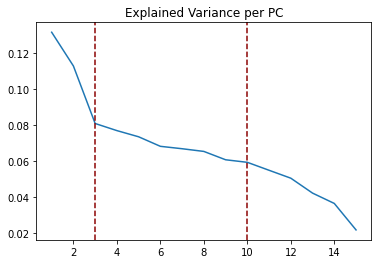

In [ ]:
# plot the variance explained the PC
plt.title("Explained Variance per PC")
sns.lineplot(range(1, len(varexp)+1), varexp)
plt.axvline(3,linestyle='--',color='darkred')
plt.axvline(10,linestyle='--',color='darkred')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


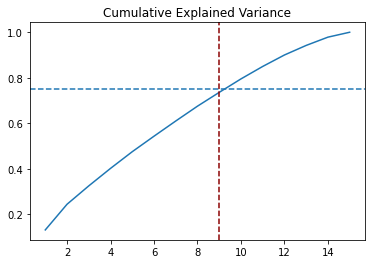

In [ ]:
# cumulative running percentange
plt.title("Cumulative Explained Variance")
sns.lineplot(range(1, len(varexp)+1), np.cumsum(varexp))
plt.axhline(.75, linestyle = "--")
plt.axvline(9,linestyle='--',color='darkred')
plt.show()

In [ ]:
comps = pca.components_
COLS = ["PC" + str(i) for i in range(1, len(varexp)+1)]
pca_df = pd.DataFrame(pcs[:,:9],columns=COLS[:9],index=ok_num.index)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,1.997944,-0.760037,-0.849936,-0.547503,-1.014348,0.418199,0.584248,-1.666044,-0.077592
1,1.280934,-0.523340,3.331869,0.494907,2.737236,0.792284,0.319149,-1.751804,-1.030034
2,-1.115864,0.887976,-0.868667,-0.400047,0.002556,-0.163269,1.083825,-1.487439,0.492390
3,-1.317986,1.483714,-0.813060,-0.499380,0.131719,0.044041,1.061241,-1.562751,1.163822
4,0.873643,-1.501400,-0.946514,0.308611,0.767448,-0.986663,1.082661,-1.114050,-0.428645
...,...,...,...,...,...,...,...,...,...
9050,2.842337,0.931529,-0.206465,-1.295802,-1.120503,1.127344,-1.400629,1.159194,0.319723
9051,-0.786742,1.300633,-0.844944,-0.631528,0.473222,-1.040723,-1.498439,0.702965,0.311794
9052,0.752885,1.723089,-0.486861,-0.844660,-0.028957,-0.663247,-1.515661,0.585814,0.270598
9053,2.327150,-0.309665,-0.157514,-1.045516,0.161532,-1.323700,-1.243351,0.811024,-0.799432


# **H-cluster**

Then we use Heirarchical Clustering to group our data with new dataset(after doing PCA).

**1. Calculate the distance between each data by pdist function.**

In [ ]:
fdist = pdist(pca_df.values)
fdist

array([5.86031876, 3.79636611, 4.38933339, ..., 2.91573808, 4.06286233,
       2.59906665])

**2. Try every linkage method to optimize our best h-cluster model. Finally we got "ward" since the result is more balanced and it is faster than other methods.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  if __name__ == '__main__':


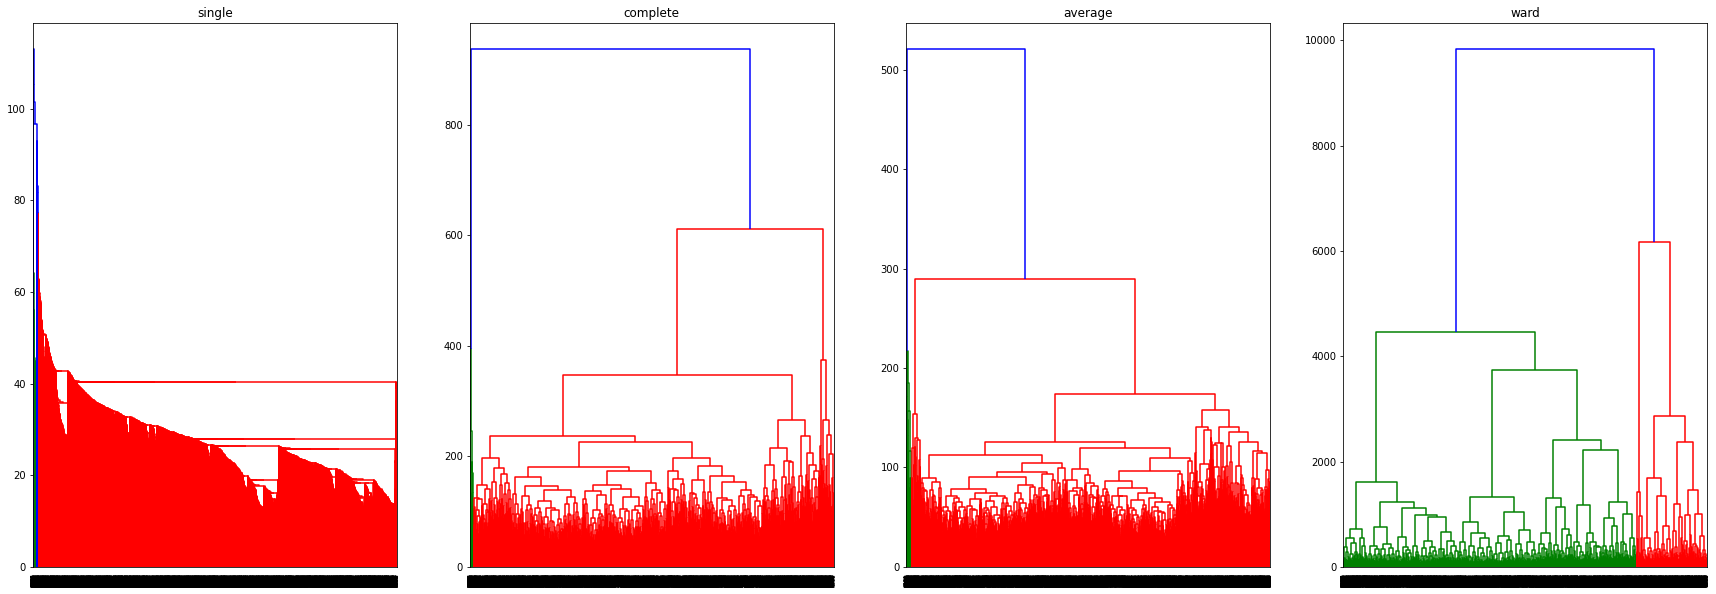

In [ ]:
# lets build our first cluster solution
# by default it's single linkage(shortest one)


METHOD = ['single', "complete", "average", "ward"]
for i, m in enumerate(METHOD):
  plt.subplot(1,4, i+1)
  plt.title(m)
  dendrogram(linkage(squareform(fdist), method = m), leaf_rotation = 90)
plt.gcf().set_size_inches(30, 10)
plt.show()

In [ ]:
# use ward as our linkage method
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
simplefilter("ignore", ClusterWarning)

hc1 = linkage(squareform(fdist), method = "ward")

In [ ]:
# what do we have
type(hc1)
hc1.shape

(9054, 4)

In [ ]:
hc1

array([[1.69000000e+03, 1.69100000e+03, 1.91447185e-03, 2.00000000e+00],
       [5.10100000e+03, 5.10600000e+03, 9.93798387e-03, 2.00000000e+00],
       [5.35200000e+03, 5.39000000e+03, 4.67795287e-01, 2.00000000e+00],
       ...,
       [1.80990000e+04, 1.81050000e+04, 4.45634925e+03, 7.30000000e+03],
       [1.80970000e+04, 1.81040000e+04, 6.16423752e+03, 1.75500000e+03],
       [1.81060000e+04, 1.81070000e+04, 9.83413977e+03, 9.05500000e+03]])

**3. We plot the dendrogram to choose the best numbers of our h-cluster model.**


*   The yellow line represents the senerio where we have five groups
*   The green line represents the senerio where we have eight groups



> Base on our goal(group users with different persona to build a recommender system for users), we believe 5 to 8 clusters is most appropriate for users.



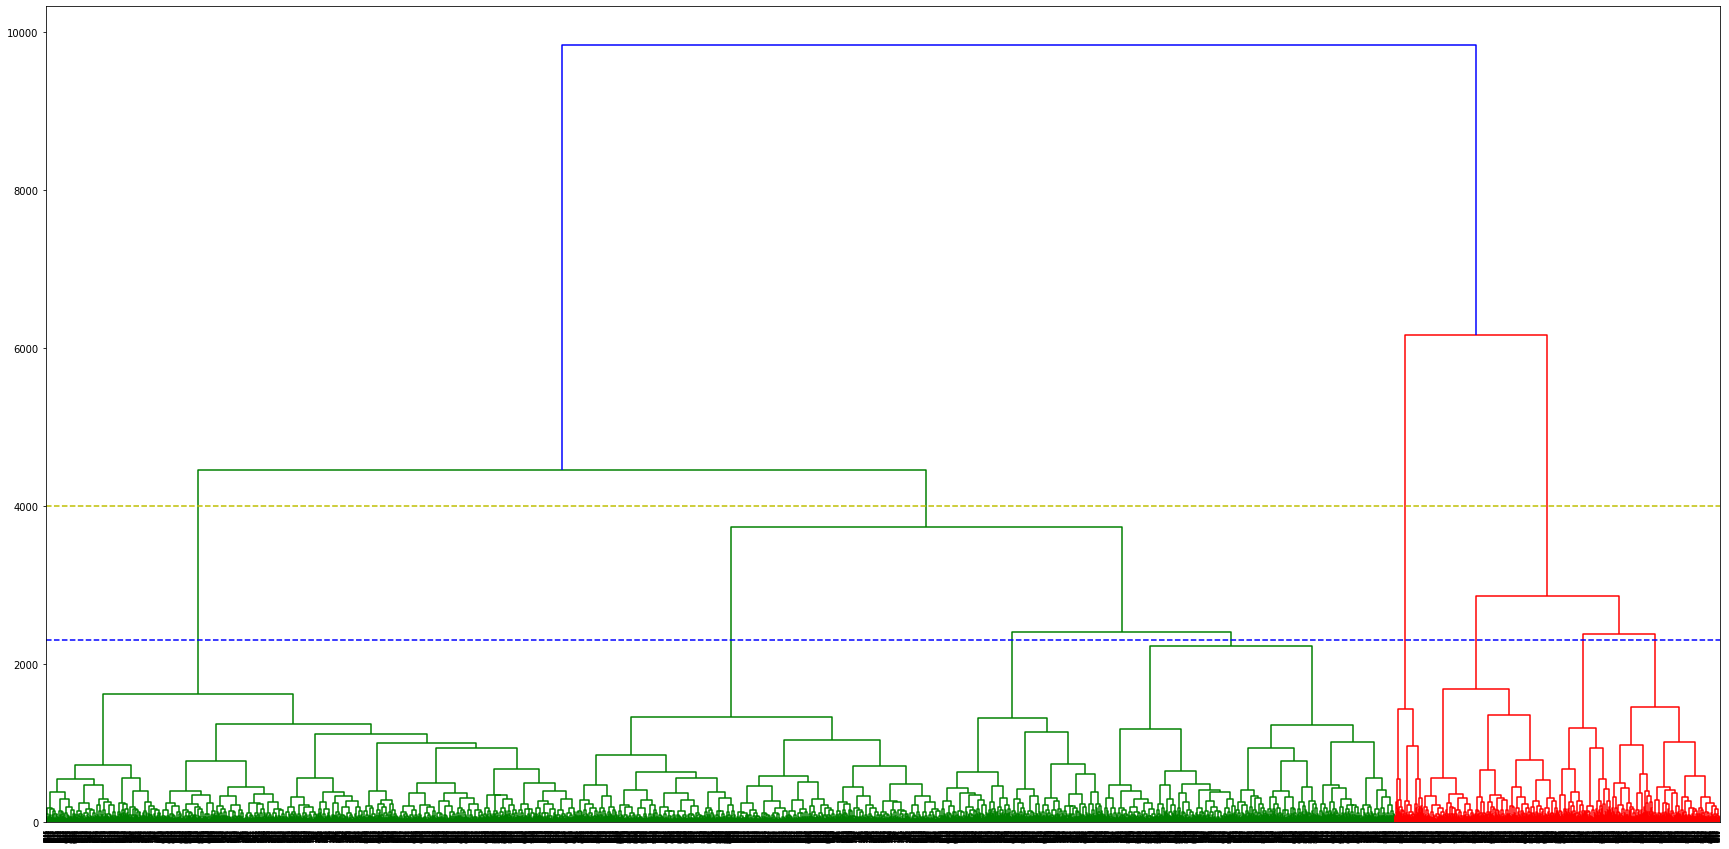

In [ ]:
# dendrogram
dendrogram(hc1)
plt.axhline(y = 4000, color = 'y', linestyle = "--")
plt.axhline(y = 2300, color = 'b', linestyle = "--")
plt.gcf().set_size_inches(30, 15)
plt.show()

In [ ]:
Df = pca_df.copy()

**4. Identify the number of clusters and see the distribution of each cluster.**


*   5 Clusters: we could see the distribution is quite even except for the cluster 4. But we know it is reasonable that we have some outliers when we are running clustering model.
*   8 Clusters: we could see the distribution is uneven and imbalanced.



In [ ]:
# fcluster - identify the number of clusters
c1 = fcluster(hc1, 4, criterion="maxclust")
Df['hcluster1'] = c1
Df.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,hcluster1
0,1.997944,-0.760037,-0.849936,-0.547503,-1.014348,0.418199,0.584248,-1.666044,-0.077592,1
1,1.280934,-0.523340,3.331869,0.494907,2.737236,0.792284,0.319149,-1.751804,-1.030034,4
2,-1.115864,0.887976,-0.868667,-0.400047,0.002556,-0.163269,1.083825,-1.487439,0.492390,2


In [ ]:
Df.hcluster1.value_counts()

2    4430
1    2870
4    1606
3     149
Name: hcluster1, dtype: int64

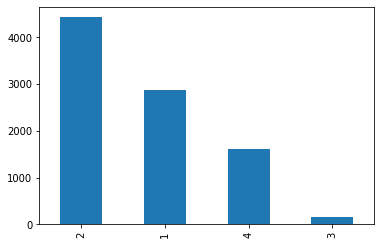

In [ ]:
Df.hcluster1.value_counts().plot(kind = "bar")

In [ ]:
# number of clusters we want
c2 = fcluster(hc1, 8, criterion="maxclust")
Df["hcluster"] = c2
Df.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,hcluster1,hcluster
0,1.997944,-0.760037,-0.849936,-0.547503,-1.014348,0.418199,0.584248,-1.666044,-0.077592,1,1
1,1.280934,-0.523340,3.331869,0.494907,2.737236,0.792284,0.319149,-1.751804,-1.030034,4,8
2,-1.115864,0.887976,-0.868667,-0.400047,0.002556,-0.163269,1.083825,-1.487439,0.492390,2,2


In [ ]:
Df.hcluster.value_counts()

1    2870
2    1975
4    1576
3     879
6     731
8     587
7     288
5     149
Name: hcluster, dtype: int64

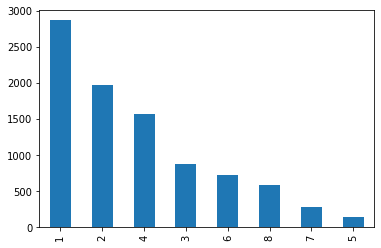

In [ ]:
Df.hcluster.value_counts().plot(kind = "bar")

5. Visualize the silhouette score to choose the optimal model.


*   5 Clusters

> Firstly, we have average score of 0.258 which is lower than 0.5. It is not ideal for clustering.

> Second, the distribution is uneven.

> Finally, the cluster 3 has lots of negative values.

*   8 Clusters

> Firstly, we have average score of 0.259 which is lower than 0.5. It is not ideal for clustering.

> Second, the distribution is uneven and imbalanced.

> Finally, the cluster 4, 6 and 8 have lots of negative values.

In [ ]:
silo_X = Df.values

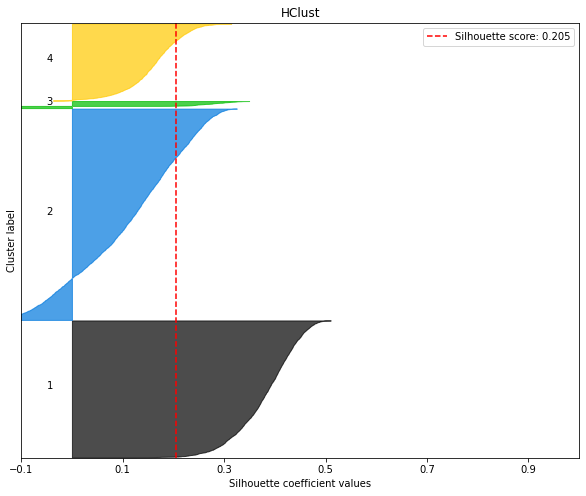

In [ ]:
# lets compare via silo
skplt.metrics.plot_silhouette(silo_X, c1, title="HClust", figsize=(10,8))
plt.show()

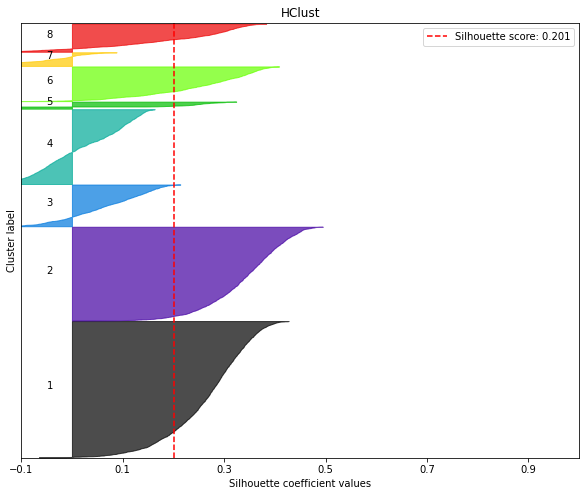

In [ ]:
# lets compare via silo
skplt.metrics.plot_silhouette(silo_X, c2, title="HClust", figsize=(10,8))
plt.show()

In [ ]:
ok_num['cluster'] = c2
ok_num.head()

,id,age,status,sex,orientation,body_type,diet,drinks,drugs,education,height,income,offspring,pets,smokes,cluster
0,0,22,0,0,0,2,0,2,0,1,75.0,0,1,0,3,1
1,1,35,0,0,0,1,4,3,1,6,70.0,80000,1,0,0,8
2,7,31,0,1,0,1,0,2,0,1,65.0,0,1,0,0,2
3,14,29,0,1,0,0,0,2,0,1,62.0,50000,1,0,0,2
4,19,33,0,0,0,4,0,2,0,2,72.0,0,0,0,0,1


# **Conclusion**

Based on our silhouette score, we know that it is relatively even and balance when we have 5 clusters, also there are few negative scores. Therefore, we believe the optimal number of heirarchical clustering is 5.